In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

import time


In [ ]:
# - grid file
gridfile = '/Users/annasommer/Documents/Work_Grenoble/Data/eNatl60/coordinates_eNATL60.nc'
gridfile_ORCA1 = '/Users/annasommer/Documents/Work_Grenoble/Data/ORCA_Grid/IPSLCM6ALR_eORCA1.2_mesh_mask.nc'

# - Define read data function
def read_datagrid(gridfile,latmin=None,latmax=None,lonmin=None,lonmax=None):
    """Return navlon,navlat."""
    ncfile = Dataset(gridfile,'r')
    # load navlon and navlat
    _navlon = ncfile.variables['glamt'][:,:]
    _navlat = ncfile.variables['gphit'][:,:]
    #-Define domain
    domain = (lonmin<_navlon) * (_navlon<lonmax) * (latmin<_navlat) * (_navlat<latmax)
    where = np.where(domain)
    vlats = _navlat[where]
    vlons = _navlon[where]
    #get indice
    jmin = where[0][vlats.argmin()]
    jmax = where[0][vlats.argmax()]
    imin = where[1][vlons.argmin()]
    imax = where[1][vlons.argmax()]
    #load arrays
    navlon = _navlon[jmin:jmax+1,imin:imax+1]
    navlat = _navlat[jmin:jmax+1,imin:imax+1]
    return navlon,navlat,jmin,jmax,imin,imax

def read_datagrid_ORCA1(gridfile,latmin=None,latmax=None,lonmin=None,lonmax=None):
    """Return navlon,navlat."""
    ncfile = Dataset(gridfile,'r')
    # load navlon and navlat
    _navlon = ncfile.variables['nav_lon'][:,:]
    _navlat = ncfile.variables['nav_lat'][:,:]
    #-Define domain
    domain = (lonmin<_navlon) * (_navlon<lonmax) * (latmin<_navlat) * (_navlat<latmax)
    where = np.where(domain)
    vlats = _navlat[where]
    vlons = _navlon[where]
    #get indice
    jmin_ORCA = where[0][vlats.argmin()]
    jmax_ORCA = where[0][vlats.argmax()]
    imin_ORCA = where[1][vlons.argmin()]
    imax_ORCA = where[1][vlons.argmax()]
    #load arrays
    print(_navlat[237:247,217])
    navlon_ORCA = _navlon[jmin_ORCA:jmax_ORCA+1,imin_ORCA:imax_ORCA+1]
    navlat_ORCA = _navlat[jmin_ORCA:jmax_ORCA+1,imin_ORCA:imax_ORCA+1]
    return navlon_ORCA,navlat_ORCA,jmin_ORCA,jmax_ORCA,imin_ORCA,imax_ORCA

y1 = 41. 
y2 = 56.
x1 = -19.
x2 = -41.

navlon_ORCA,navlat_ORCA,jmin_ORCA,jmax_ORCA,imin_ORCA,imax_ORCA = read_datagrid_ORCA1(gridfile_ORCA1,latmin=y1,latmax=y2,lonmin=x2,lonmax=x1)
print(jmin_ORCA,jmax_ORCA,imin_ORCA,imax_ORCA)
print(navlon_ORCA.min())
print(navlat_ORCA.min())
print(navlon_ORCA.max())
print(navlat_ORCA.max())
print(navlat_ORCA[:,0])

# - Define box dimensions
a = (np.shape(navlon_ORCA)[0]-2.)*(np.shape(navlat_ORCA)[1]-2.)
Box_arr = np.empty((int(a),6),dtype=np.dtype('U100'))
print(a)

ii = 0
jj = 0
for i in np.arange(0,int(a),1):
    delta_lat1 = np.abs(navlat_ORCA[ii+1,jj] - navlat_ORCA[ii,jj])/2.
    delta_lat2 = np.abs(navlat_ORCA[ii+2,jj] - navlat_ORCA[ii+1,jj])/2.
    delta_lon1 = np.abs(navlon_ORCA[ii,jj+1] - navlon_ORCA[ii,jj])/2.
    delta_lon2 = np.abs(navlon_ORCA[ii,jj+2] - navlon_ORCA[ii,jj+1])/2.        
    Box_arr[i,:] = [str(navlat_ORCA[ii,jj]+delta_lat1),str(navlat_ORCA[ii+1,jj]+delta_lat2),str(navlon_ORCA[ii,jj]+delta_lon1),str(navlon_ORCA[ii,jj+1]+delta_lon2),'Box_'+str(i),str(i)]
    print(navlat_ORCA[ii,jj],navlat_ORCA[ii+1,jj],navlon_ORCA[ii,jj],navlon_ORCA[ii,jj+1])
    print(ii,jj)
    print(Box_arr[i,:])
    ii = ii + 1
    if ii >= int(np.shape(navlon_ORCA)[0])-2:
        ii = 0
        jj = jj + 1
        
#Box_01 = ['32.0','30.0','-70.0','-68.0','Box_1','1']
#Box_02 = ['32.0','30.0','-68.0','-66.0','Box_2','2']
#Box_03 = ['32.0','30.0','-66.0','-64.0','Box_3','3']
#Box_04 = ['32.0','30.0','-64.0','-62.0','Box_4','4']
#Box_05 = ['32.0','30.0','-62.0','-60.0','Box_5','5']
#Box_06 = ['32.0','30.0','-60.0','-58.0','Box_6','6']
#Box_07 = ['32.0','30.0','-58.0','-56.0','Box_7','7']
#Box_08 = ['32.0','30.0','-56.0','-54.0','Box_8','8']
#Box_09 = ['32.0','30.0','-54.0','-52.0','Box_9','9']
#Box_10 = ['32.0','30.0','-52.0','-50.0','Box_10','10']
#Box_11 = ['32.0','30.0','-50.0','-48.0','Box_11','11']
#Box_12 = ['32.0','30.0','-48.0','-46.0','Box_12','12']
#Box_13 = ['32.0','30.0','-46.0','-44.0','Box_13','13']
#Box_14 = ['32.0','30.0','-44.0','-42.0','Box_14','14']

# - Generate box array
#box_arr = []
#for ii in np.arange(1,int(a),1):
#    name = eval('Box_'+str(ii).zfill(2))
#    box_arr.append(name)

name = Box_arr[:,4]

#- defining dictionaries for the boxes
class box: # empty container.
    def __init__(self,name=None):
        self.name = name
        return

dictboxes = {}

for i in np.arange(0,int(a),1):
    
    #y2 = eval(ibox[0]) ;y1 = eval(ibox[1]);
    #x2 = eval(ibox[2]) ;x1 = eval(ibox[3]);
    #box_name = ibox[4]
    y1 = float(Box_arr[i,0]); y2 = float(Box_arr[i,1]);
    x2 = float(Box_arr[i,2]); x1 = float(Box_arr[i,3]);
    box_name = Box_arr[i,4]
    print(box_name)
    
    # - Obtain navlon and Navlat
    navlon,navlat,jmin,jmax,imin,imax = read_datagrid(gridfile,latmin=y1,latmax=y2,lonmin=x2,lonmax=x1)
    
    # - save box parameter
    abox = box(box_name)
    abox.lonmin = navlon.min()
    abox.lonmax = navlon.max()
    abox.latmin = navlat.min()
    abox.latmax = navlat.max()
    abox.navlon = navlon
    abox.navlat = navlat
    abox.imin = imin
    abox.imax = imax
    abox.jmin = jmin
    abox.jmax = jmax
    abox.nb = int(Box_arr[i,5])#ibox[5]
    dictboxes[box_name] = abox
    
boxes = dictboxes.values()

for box in boxes:
    print(box.name,box.imin,box.imax,box.jmin,box.jmax)

[33.66823  34.464577 35.250126 36.024837 36.788696 37.54171  38.28391
 39.015335 39.736065 40.44617 ]
246 267 247 268
-41.59786
41.07036
-18.761578
55.97206
[41.07036  41.83358  42.589314 43.337605 44.078495 44.81203  45.538277
 46.25729  46.969135 47.67389  48.37163  49.06244  49.746403 50.42361
 51.094154 51.758137 52.415657 53.06682  53.711727 54.35049  54.98322
 55.610023]
400.0
41.07036 41.83358 -40.606426 -39.598843
0 0
['41.451969146728516' '42.21144676208496' '-40.10263442993164'
 '-39.09493446350098' 'Box_0' '0']
41.83358 42.589314 -40.623825 -39.615032
1 0
['42.21144676208496' '42.96345901489258' '-40.119428634643555'
 '-39.11050033569336' 'Box_1' '1']
42.589314 43.337605 -40.64321 -39.633076
2 0
['42.96345901489258' '43.70804977416992' '-40.13814353942871'
 '-39.127851486206055' 'Box_2' '2']
43.337605 44.078495 -40.664715 -39.653103
3 0
['43.70804977416992' '44.44526290893555' '-40.15890884399414'
 '-39.14711570739746' 'Box_3' '3']
44.078495 44.81203 -40.688477 -39.675236
4 

15 10
['52.33408546447754' '53.00290298461914' '-30.129858016967773'
 '-29.07536506652832' 'Box_215' '215']
52.669975 53.33583 -30.674833 -29.615566
16 10
['53.00290298461914' '53.66585159301758' '-30.1451997756958'
 '-29.08556079864502' 'Box_216' '216']
53.33583 53.995872 -30.694359 -29.629642
17 10
['53.66585159301758' '54.32304382324219' '-30.16200065612793'
 '-29.09687614440918' 'Box_217' '217']
53.995872 54.650215 -30.71563 -29.645113
18 10
['54.32304382324219' '54.9745979309082' '-30.180371284484863'
 '-29.109407424926758' 'Box_218' '218']
54.650215 55.29898 -30.738771 -29.662088
19 10
['54.9745979309082' '55.620635986328125' '-30.200429916381836'
 '-29.123258590698242' 'Box_219' '219']
41.148556 41.92006 -29.512024 -28.502506
0 11
['41.5343074798584' '42.302289962768555' '-29.007265090942383'
 '-27.997695922851562' 'Box_220' '220']
41.92006 42.68452 -29.514303 -28.503256
1 11
['42.302289962768555' '43.06325149536133' '-29.008779525756836'
 '-27.997673988342285' 'Box_221' '221']


2 19
['43.036678314208984' '43.78903007507324' '-20.90564727783203'
 '-19.892383575439453' 'Box_382' '382']
43.41458 44.16348 -21.3999 -20.38468
3 19
['43.78903007507324' '44.534507751464844' '-20.892290115356445'
 '-19.87708282470703' 'Box_383' '383']
44.16348 44.905537 -21.386389 -20.369026
4 19
['44.534507751464844' '45.27317810058594' '-20.877707481384277'
 '-19.86036205291748' 'Box_384' '384']
44.905537 45.64082 -21.371708 -20.352001
5 19
['45.27317810058594' '46.00511360168457' '-20.861854553222656'
 '-19.842166900634766' 'Box_385' '385']
45.64082 46.369408 -21.355818 -20.33355
6 19
['46.00511360168457' '46.73039245605469' '-20.84468364715576'
 '-19.822439193725586' 'Box_386' '386']
46.369408 47.091377 -21.33868 -20.313623
7 19
['46.73039245605469' '47.44909477233887' '-20.826151847839355'
 '-19.80112361907959' 'Box_387' '387']
47.091377 47.806812 -21.32026 -20.292177
8 19
['47.44909477233887' '48.161312103271484' '-20.806218147277832'
 '-19.77816867828369' 'Box_388' '388']
47.80

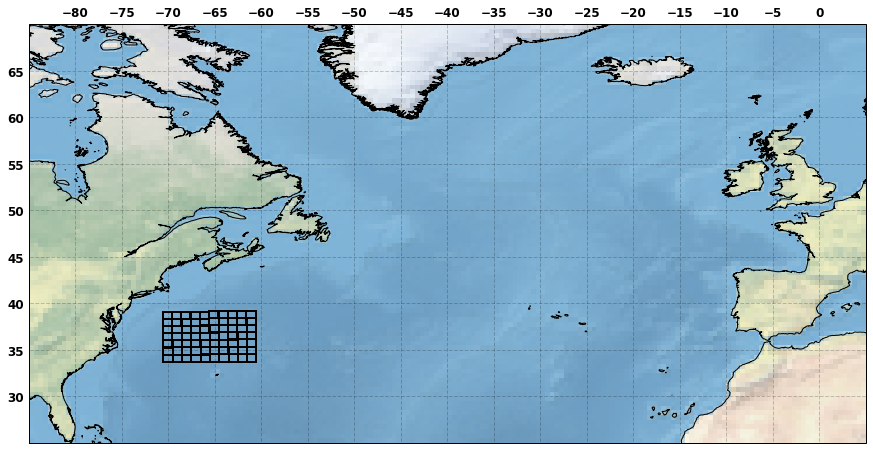

In [3]:
transform = ccrs.PlateCarree()

pltargs = {
   'transform' : transform,
   'color' : 'black',
   'linewidth' : 2}

def plot_individual_box(box,ax=None):
    x1 = box.lonmin
    x2 = box.lonmax
    y1 = box.latmin
    y2 = box.latmax
    ax.plot([x1, x2], [y1, y1],**pltargs)
    ax.plot([x1, x2], [y2, y2],**pltargs)
    ax.plot([x1, x1], [y1, y2],**pltargs)
    ax.plot([x2, x2], [y1, y2],**pltargs)
    #ax.text(x1+0.1,y1+0.1,box.nb)


def plot_boxes(boxlist,textbox=None,title=None):
    plt.figure(figsize=(15,10))
    proj = transform
    ax = plt.axes(projection=proj)
    ax.stock_img()
    for box in boxlist:
        plot_individual_box(box,ax=ax)
    ax.coastlines(resolution="10m")

    # grid lines
    gl = ax.gridlines(draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

    label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

    gl.xlabel_style = label_style
    gl.xlabels_bottom = False
    gl.xlocator = mticker.FixedLocator(np.arange(-90,10,5,dtype=float))

    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(20,80,5,dtype=float))


    #ax.grid(False)
    plt.xlim((-85,5))
    plt.ylim((25,70))
    if textbox is not None:
        # see http://matplotlib.org/users/annotations_guide.html
        props = dict(boxstyle='round', facecolor='white', alpha=1., edgecolor="black", lw=2)
        ax.text(0.05, 0.10, textbox, transform=ax.transAxes, fontsize=18,verticalalignment='top',bbox=props)
    if title is not None:
        plt.title(title,fontsize=20,y=1.08)

       
plot_boxes(boxes,textbox=None,title=None)
plt.savefig('test_map_boxes_1x1_GS.png')